In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [2]:
#Load dataset
df=pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Columns



#Pregnancies:

#Glucose:    Glucose test result

#BloodPressure:    (mm Hg)

#SkinThickness:  Triceps skinfold thickness (mm)

#Insulin:    2-hour serum insulin (mu U/ml)

#BMI:      Body mass index (weight kg / (m height) ^ 2)

#DiabetesPedigreeFunction:     pedigree function of diabetes

#Age:   (year)

#Outcome:  Class (0 - non diabet , 1 - diabet)



# 1. Understanding dataset

In [3]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [4]:
corr_matrix=df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [5]:
#Check correcaltion of outcome(0 - non diabet , 1 - diabet) with other features

df.corrwith(df['Outcome']).abs().sort_values(ascending=False)


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [6]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']


In [8]:

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler=StandardScaler()

# Fit and transform the data
X=scaler.fit_transform(X)


In [9]:
#Split the data into training and validation sets (80% training, 20% test).

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


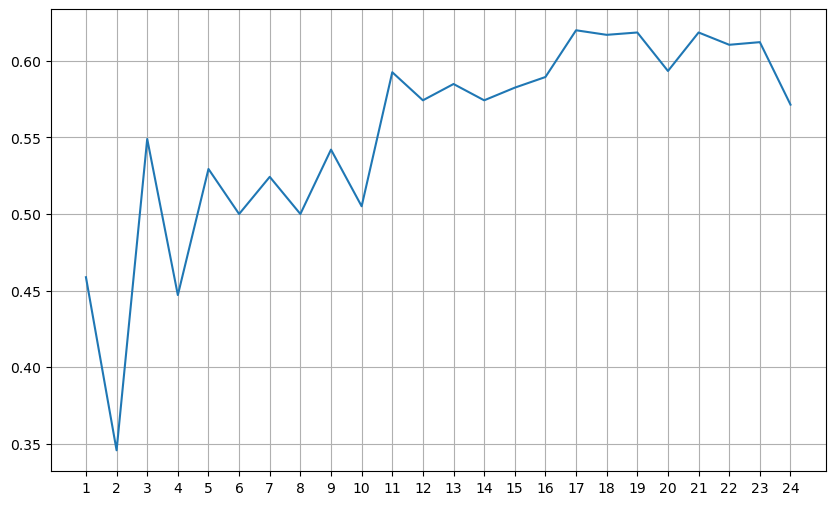

In [14]:
#to find suitable k for the algorithm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

f1=[]
for k in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_predict=knn.predict(X_test)
    f1.append(f1_score(y_test,y_predict))
plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [36]:

from sklearn.model_selection import GridSearchCV
# Import the GridSearchCV class from scikit-learn, which is used for hyperparameter tuning.

param_grid = {'n_neighbors': np.arange(1, 25)}
# Define the parameter grid for GridSearchCV. Here, we are tuning the 'n_neighbors' hyperparameter of the KNN model.
# np.arange(1, 25) generates a range of values from 1 to 24, which will be tested to find the optimal number of neighbors.

knn_gscv = GridSearchCV(knn, param_grid, cv=5, verbose=2)
# Initialize the GridSearchCV object:
# - `knn`: This should be an instance of the KNN model (e.g., KNeighborsClassifier()).
# - `param_grid`: The dictionary containing the hyperparameters to tune.
# - `cv=5`: Use 5-fold cross-validation to evaluate the performance of each hyperparameter combination.
# - `verbose=2`: Set the verbosity level to 2 to get detailed output about the progress and results of the grid search.

knn_gscv.fit(X, y)
# Fit the GridSearchCV object to the data:
# - `X`: The feature matrix containing the input data.
# - `y`: The target vector containing the output labels.
# This performs the grid search over the specified hyperparameter values and selects the best combination based on cross-validation performance.


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=17),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             verbose=2)

In [37]:
knn_gscv.cv_results_

{'mean_fit_time': array([0.00249395, 0.00025964, 0.00026217, 0.00026107, 0.00026488,
        0.00025697, 0.00026064, 0.00025702, 0.0002542 , 0.0002564 ,
        0.00025272, 0.00025387, 0.00029278, 0.00025692, 0.00025868,
        0.00025716, 0.0002574 , 0.00025821, 0.00030174, 0.00026031,
        0.00026035, 0.00025678, 0.00025826, 0.00025988]),
 'std_fit_time': array([4.37370898e-03, 5.47221281e-06, 1.10546034e-05, 3.29673500e-06,
        9.89135443e-06, 3.17517697e-06, 6.15360154e-06, 3.53310271e-06,
        2.46114500e-06, 4.49240330e-06, 1.94862525e-06, 1.66142000e-06,
        6.81808775e-05, 9.12243198e-07, 3.17374445e-06, 1.16410786e-06,
        1.66961111e-06, 2.79265413e-06, 9.31722725e-05, 5.19818118e-06,
        6.35643785e-06, 2.51415755e-06, 2.94483140e-06, 2.37462990e-06]),
 'mean_score_time': array([0.00343785, 0.00232058, 0.0028388 , 0.00238328, 0.00241871,
        0.00243011, 0.00249896, 0.00254478, 0.0025528 , 0.00253949,
        0.00254579, 0.00258675, 0.00309911, 0.00

In [38]:
knn_gscv.best_params_ 
# Retrieve the best hyperparameter values(k) found during the grid search.

{'n_neighbors': 17}

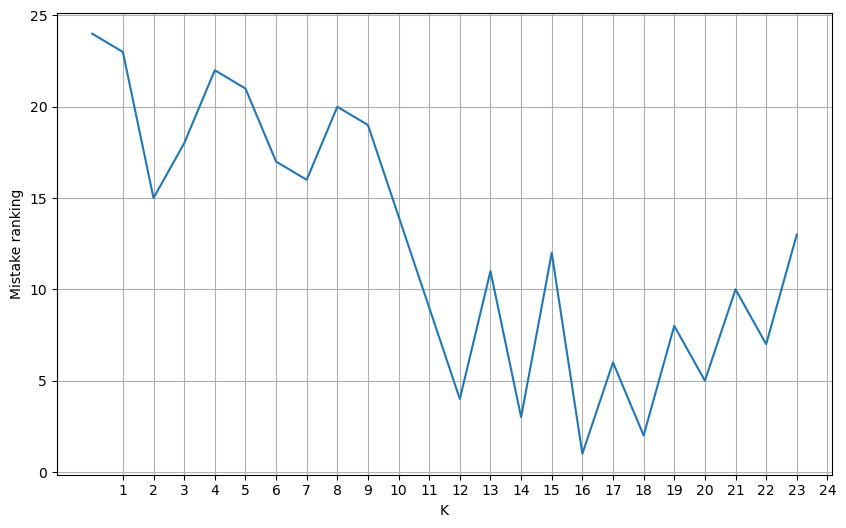

In [39]:
plt.figure(figsize=(10,6))
plt.plot(knn_gscv.cv_results_['rank_test_score'])
plt.xlabel('K')
plt.ylabel('Mistake ranking')
plt.xticks(param_grid['n_neighbors'])
plt.grid()
plt.show()

In [40]:
knn_gscv.best_score_     
# Get the best cross-validation score achieved during the grid search.

0.7669892199303965

In [41]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=17)

In [42]:

y_predict=knn.predict(X_test)
# Predict labels for the test set using the trained KNN model

In [43]:
accuracy=accuracy_score(y_test,y_predict)
recall=recall_score(y_test,y_predict)
precision=precision_score(y_test,y_predict)
f1=f1_score(y_test,y_predict)
print('Accuracy:',accuracy)
print('Precision: ',precision)
print('Recall : ',recall)
print('F1_score: ',f1)

Accuracy: 0.7532467532467533
Precision:  0.6888888888888889
Recall :  0.5636363636363636
F1_score:  0.6199999999999999


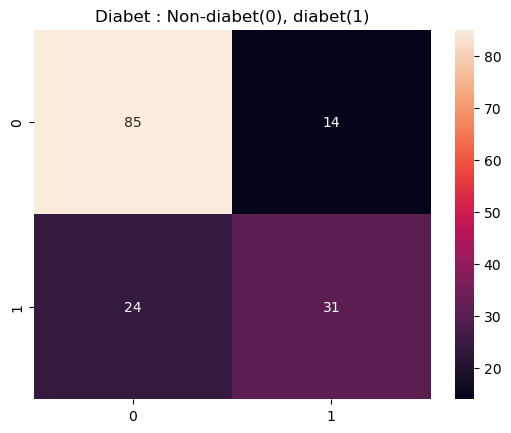

In [44]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.title('Diabet : Non-diabet(0), diabet(1)')

plt.show()